<h1> N Karthik(4178520) <h1>
<h1> Alfin Abraham (4181788) <h1>

## TW7 Supervised Learning: Classification


### Setup

In [148]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part0

- Develop a classifier using Decition Trees

    - Use two methods for criterion: Entropy and Gini

- Find important features

- Understand and implement a framework of k-cross validation

- Evaluate model performance

    - Task: Calculate the averages of k-folds

### Dataset 1: iris

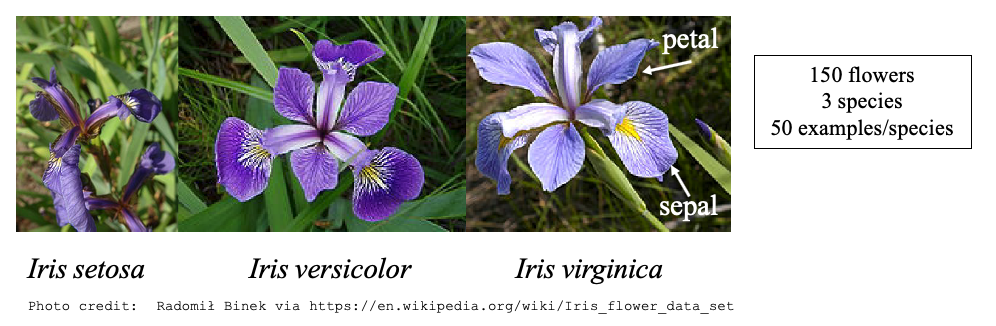

In [106]:
from sklearn.datasets import load_iris
iris = load_iris()

from IPython.display import Image

Image("iris.png")

#### Extract mportant features from Decition Trees

In [107]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)


#### Important features from a decision tree

- Decision tree classifier

https://scikit-learn.org/stable/modules/tree.html#classification

- Metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

#### Train-test split

- A simple way to prepare training-testing data

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)

#### Build a decition tree (with 'entropy' method)

- Important features from a decision tree using information gain measure (entropy)

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.95


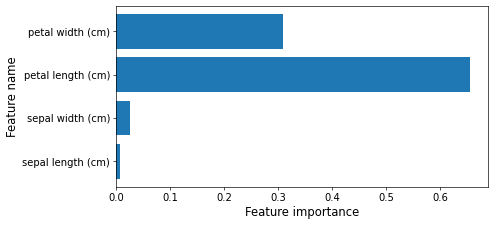

Feature importances: [0.00702077 0.02681122 0.65612204 0.31004597]


In [109]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

plt.figure(figsize=(8,4), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, iris.feature_names)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

#### DT visualization

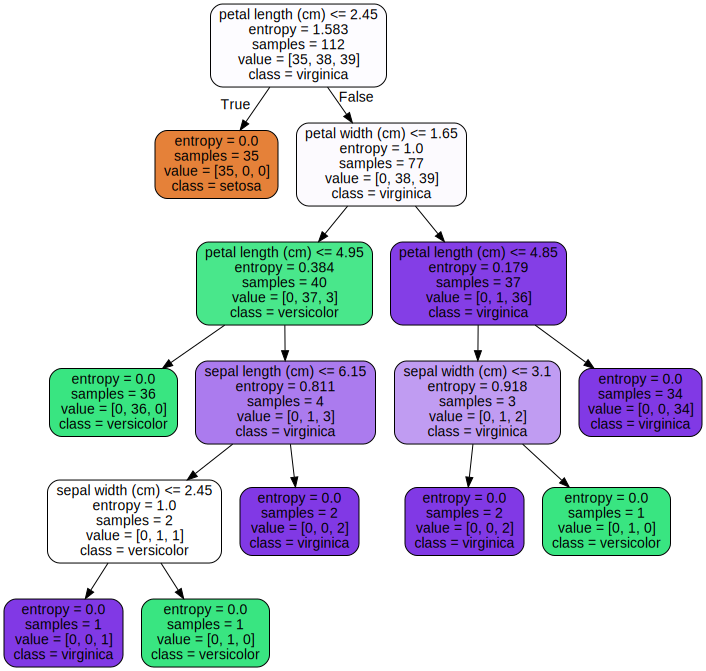

In [110]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree1.dot"),
        feature_names=iris.feature_names[0:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree1.dot"))

#### Build a decition tree (with 'gini' method)

- Important features from a decision tree using information gain measure (gini)

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.95


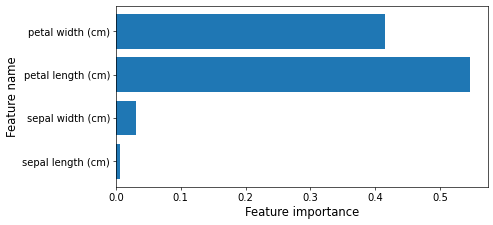

Feature importances: [0.00670338 0.03128242 0.54643762 0.41557658]


In [111]:
clf2 = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

plt.figure(figsize=(8,4), dpi=60)

plot_feature_importances(clf2, iris.feature_names)

plt.show()

print('Feature importances: {}'.format(clf2.feature_importances_))

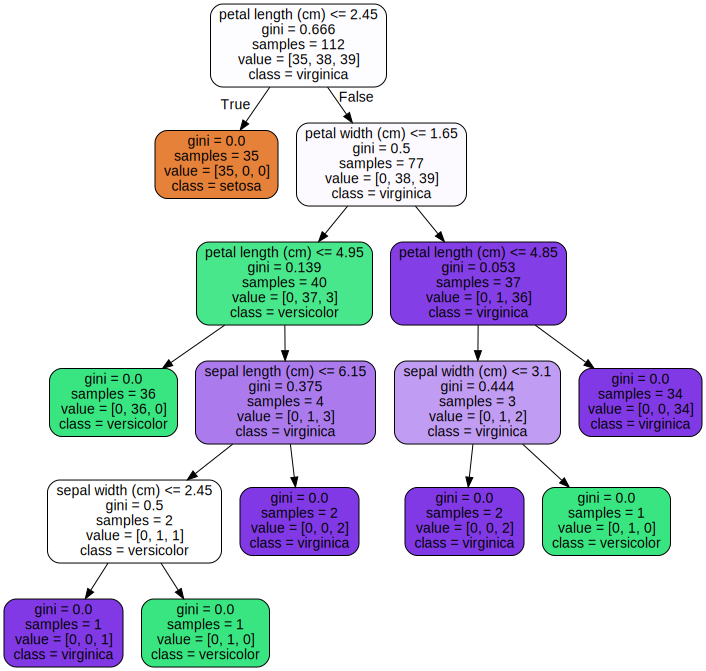

In [112]:
export_graphviz(
        clf2,
        out_file=os.path.join(IMAGES_PATH, "iris_tree2.dot"),
        feature_names=iris.feature_names[0:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree2.dot"))

### k-cross validation

##### Construct a decision tree (default criterion: entropy)

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

##### k-cross validation and averge the results

In [114]:
from sklearn.model_selection import KFold # import k-fold validation

k = 3

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

3

### Task: Make a summary of the model performance

<p style='color:red'> 
Conduct k-cross validation and aaverage k folds' results 
</p> 

- For each fold, access performance measures stored in result_metrics_dict. 

- Currently the code shows the content of the dictionary and an example that shows how to access 'precision' measure of a class 'setosa'. 

- Calculate the averages of the following:
    - accuracy
    - precision, recall, and f1-score for each class
    - macro average of precision, recall, and f1-score
    - weighted average of precision, recall, and f1-score

In [115]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    print(result_metrics_dict)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['setosa']['precision']
    
print('\n class 0: ', c0_avg_precision/k)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19}, 'versicolor': {'precision': 0.9333333333333333, 'recall': 1.0, 'f1-score': 0.9655172413793104, 'support': 14}, 'virginica': {'precision': 1.0, 'recall': 0.9411764705882353, 'f1-score': 0.9696969696969697, 'support': 17}, 'accuracy': 0.98, 'macro avg': {'precision': 0.9777777777777779, 'recall': 0.9803921568627452, 'f1-score': 0.9784047370254267, 'support': 50}, 'weighted avg': {'precision': 0.9813333333333333, 'recall': 0.98, 'f1-score': 0.9800417972831766, 'support': 50}}
              precision    recall  f1-score   support

      se

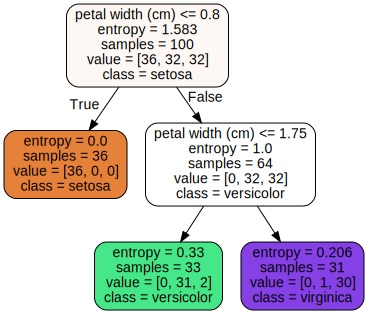

In [116]:
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree3.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree3.dot"))

### Dataset 2: Breast Cancer dataset

In [117]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [118]:
X_cancer.size

17070

#### Training-testing split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

#### Important features from a decision tree using entropy index¶

Accuracy of DT classifier on training set: 0.93
Accuracy of DT classifier on test set: 0.90


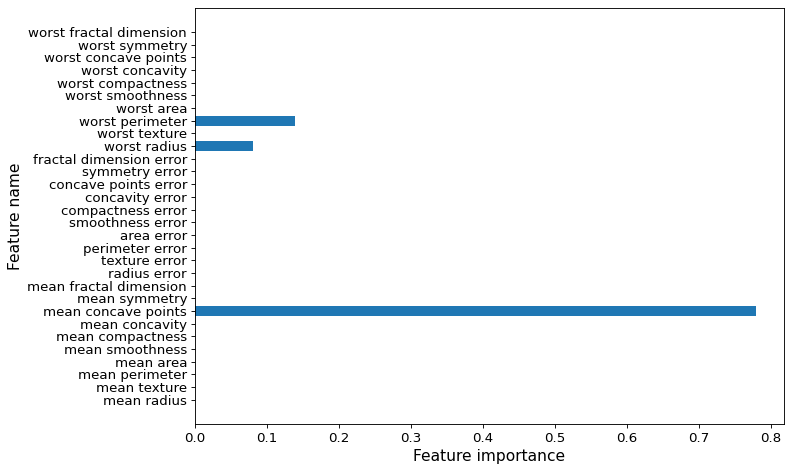

In [120]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 2, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

#### Important features from a decision tree using gini index¶

Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


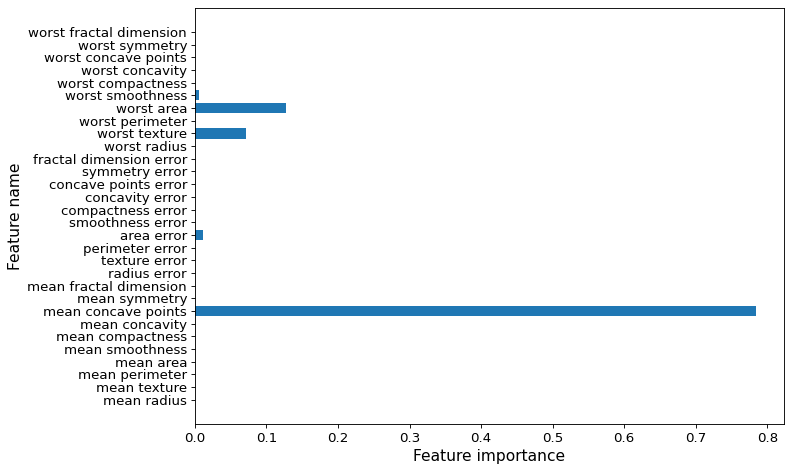

In [121]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

## Part 1

The best practice is to define a classification program for the dataset(s) of your term project. 

In case a classification problem is not possibly defined for your datasets, you can use the cancer dataset in the example above. 

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Construct  a decision tree using the following parameters

- Use information gini measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold

#### 3. Performance comparisons

- Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 4. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

In [122]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

Accuracy of DT classifier on training set: 0.93
Accuracy of DT classifier on test set: 0.90


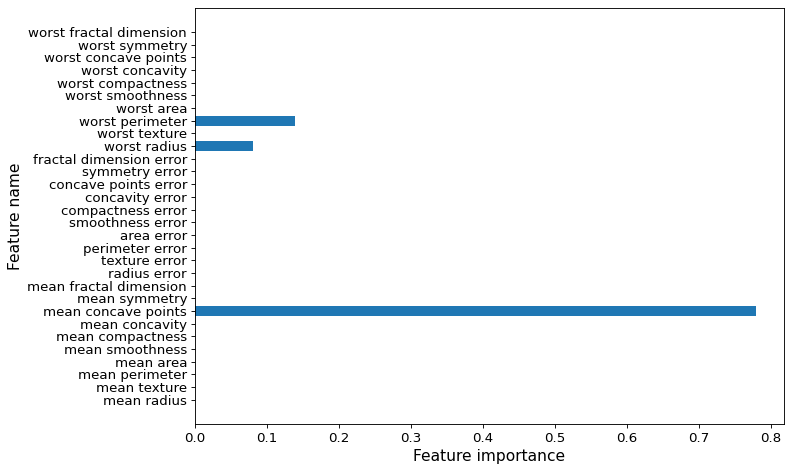

In [124]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 2, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_entropy.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_entropy.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_entropy, cancer.feature_names)
plt.tight_layout()

plt.show()

K-Cross Validation where K = 3

In [125]:
from sklearn.model_selection import KFold # import k-fold validation

k = 3

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

3

In [126]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_entropy .fit(X_train, y_train)
    y_pred = clf_entropy .predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict01 = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(result_metrics_dict01)

              precision    recall  f1-score   support

   malignant       0.81      0.85      0.83        26
      benign       0.83      0.79      0.81        24

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50

{'malignant': {'precision': 0.8148148148148148, 'recall': 0.8461538461538461, 'f1-score': 0.830188679245283, 'support': 26}, 'benign': {'precision': 0.8260869565217391, 'recall': 0.7916666666666666, 'f1-score': 0.8085106382978724, 'support': 24}, 'accuracy': 0.82, 'macro avg': {'precision': 0.820450885668277, 'recall': 0.8189102564102564, 'f1-score': 0.8193496587715776, 'support': 50}, 'weighted avg': {'precision': 0.8202254428341385, 'recall': 0.82, 'f1-score': 0.8197832195905258, 'support': 50}}
              precision    recall  f1-score   support

   malignant       0.86      0.68      0.76        28
      benign       0.68      0.86      0.76        22

    ac

Max_depth = 3

Accuracy of DT classifier on training set: 0.95
Accuracy of DT classifier on test set: 0.92


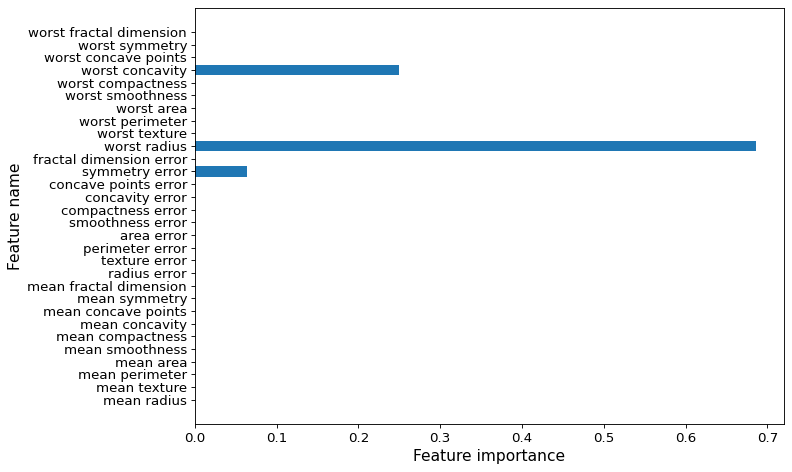

In [127]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_entropy.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_entropy.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_entropy, cancer.feature_names)
plt.tight_layout()

plt.show()

Max_depth = 4

Accuracy of DT classifier on training set: 0.95
Accuracy of DT classifier on test set: 0.92


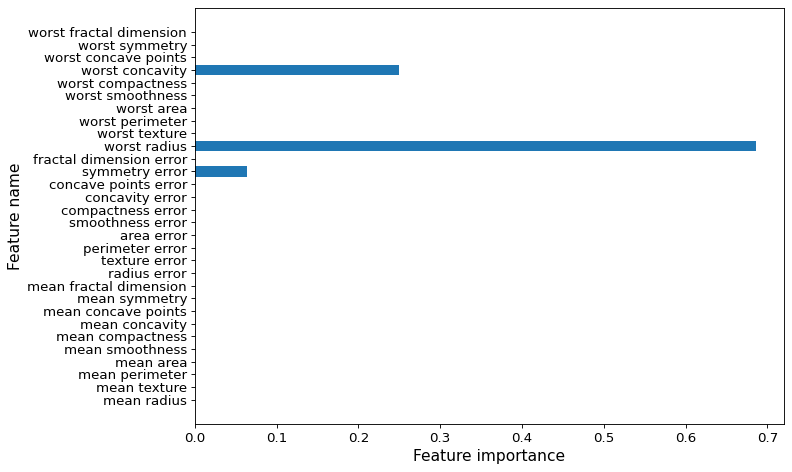

In [128]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_entropy.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_entropy.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_entropy, cancer.feature_names)
plt.tight_layout()

plt.show()

Max-depth = 5

Accuracy of DT classifier on training set: 0.95
Accuracy of DT classifier on test set: 0.92


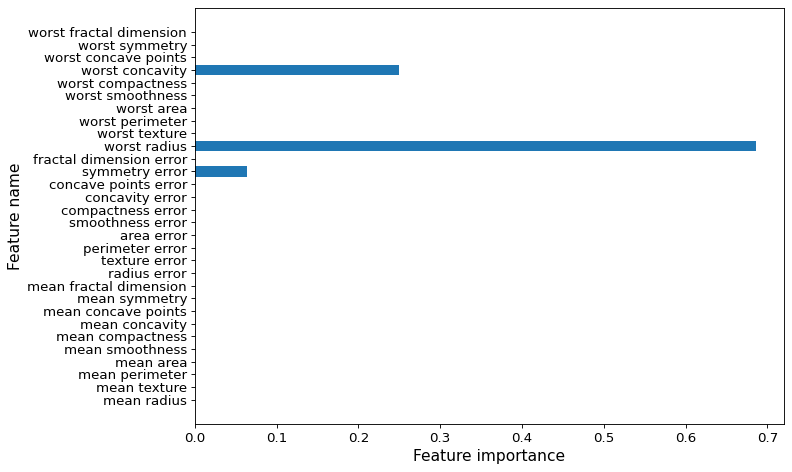

In [129]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_entropy.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_entropy.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_entropy, cancer.feature_names)
plt.tight_layout()

plt.show()

K-Cross validation where K = 5 

In [130]:
from sklearn.model_selection import KFold # import k-fold validation

k = 5

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

5

In [131]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_entropy .fit(X_train, y_train)
    y_pred = clf_entropy .predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict01 = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(result_metrics_dict01)

              precision    recall  f1-score   support

   malignant       0.92      0.85      0.88        13
      benign       0.89      0.94      0.91        17

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30

{'malignant': {'precision': 0.9166666666666666, 'recall': 0.8461538461538461, 'f1-score': 0.8799999999999999, 'support': 13}, 'benign': {'precision': 0.8888888888888888, 'recall': 0.9411764705882353, 'f1-score': 0.9142857142857143, 'support': 17}, 'accuracy': 0.9, 'macro avg': {'precision': 0.9027777777777777, 'recall': 0.8936651583710407, 'f1-score': 0.897142857142857, 'support': 30}, 'weighted avg': {'precision': 0.9009259259259259, 'recall': 0.9, 'f1-score': 0.8994285714285714, 'support': 30}}
              precision    recall  f1-score   support

   malignant       0.83      0.88      0.86        17
      benign       0.83      0.77      0.80        13

    acc

K-Cross Validation where K = 7

In [132]:
from sklearn.model_selection import KFold # import k-fold validation

k = 7

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

7

In [133]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_entropy .fit(X_train, y_train)
    y_pred = clf_entropy .predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict01 = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(result_metrics_dict01)

              precision    recall  f1-score   support

   malignant       0.92      0.86      0.89        14
      benign       0.78      0.88      0.82         8

    accuracy                           0.86        22
   macro avg       0.85      0.87      0.86        22
weighted avg       0.87      0.86      0.87        22

{'malignant': {'precision': 0.9230769230769231, 'recall': 0.8571428571428571, 'f1-score': 0.888888888888889, 'support': 14}, 'benign': {'precision': 0.7777777777777778, 'recall': 0.875, 'f1-score': 0.823529411764706, 'support': 8}, 'accuracy': 0.8636363636363636, 'macro avg': {'precision': 0.8504273504273505, 'recall': 0.8660714285714286, 'f1-score': 0.8562091503267975, 'support': 22}, 'weighted avg': {'precision': 0.8702408702408703, 'recall': 0.8636363636363636, 'f1-score': 0.8651218062982768, 'support': 22}}
              precision    recall  f1-score   support

   malignant       0.75      0.90      0.82        10
      benign       0.90      0.75      0.82    

K-Cross Validation where K = 10

In [134]:
from sklearn.model_selection import KFold # import k-fold validation

k = 10

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

10

In [135]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_entropy .fit(X_train, y_train)
    y_pred = clf_entropy .predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict01 = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(result_metrics_dict01)

              precision    recall  f1-score   support

   malignant       0.86      0.86      0.86         7
      benign       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

{'malignant': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 7}, 'benign': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8}, 'accuracy': 0.8666666666666667, 'macro avg': {'precision': 0.8660714285714286, 'recall': 0.8660714285714286, 'f1-score': 0.8660714285714286, 'support': 15}, 'weighted avg': {'precision': 0.8666666666666667, 'recall': 0.8666666666666667, 'f1-score': 0.8666666666666667, 'support': 15}}
              precision    recall  f1-score   support

   malignant       0.64      1.00      0.78         7
      benign       1.00      0.50      0.67         8

    accuracy     

Using 'gini' with max_depth = 2

Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.80


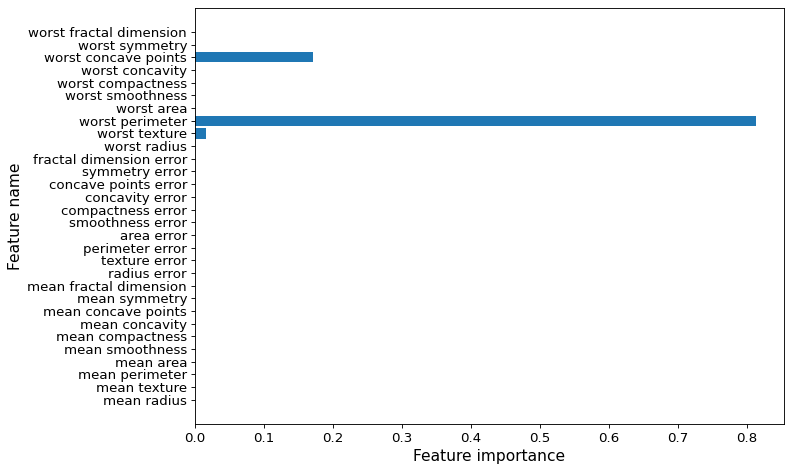

In [136]:
clf_gini= DecisionTreeClassifier(criterion='gini', max_depth = 2, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_gini, cancer.feature_names)
plt.tight_layout()

plt.show()

Max_depth = 3

Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.80


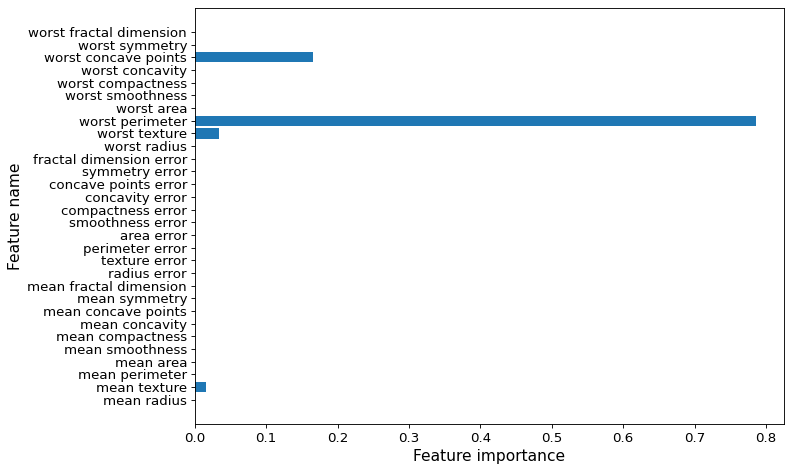

In [137]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_gini, cancer.feature_names)
plt.tight_layout()

plt.show()

Max_depth = 4 

Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.80


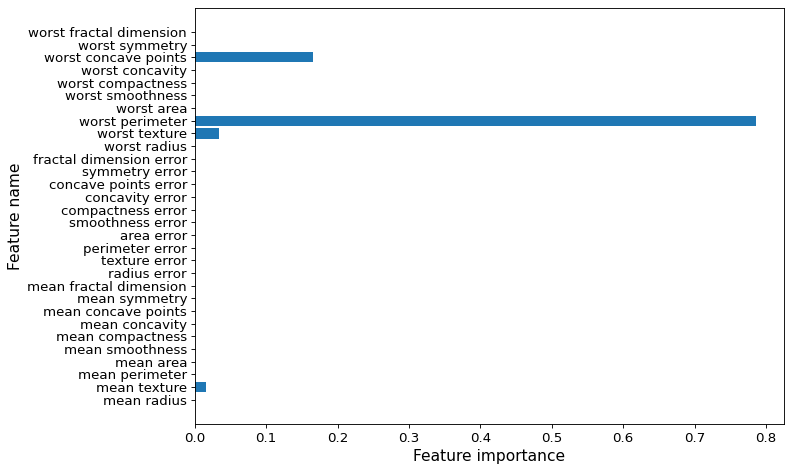

In [138]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_gini, cancer.feature_names)
plt.tight_layout()

plt.show()

Max_depth = 5

Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.80


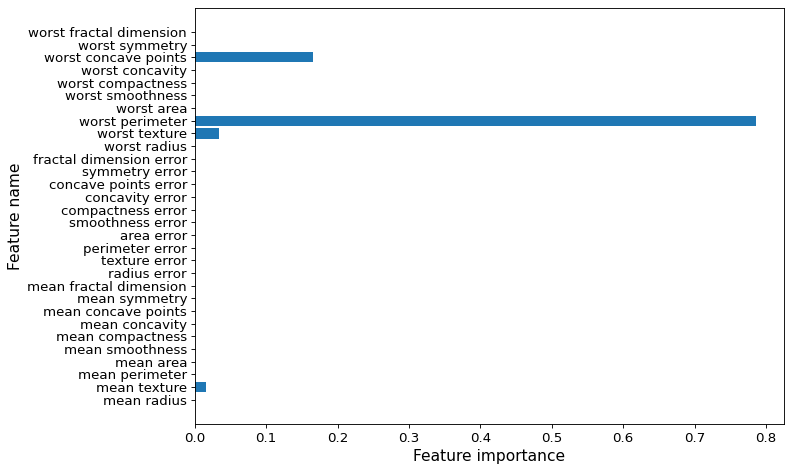

In [139]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))


plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_gini, cancer.feature_names)
plt.tight_layout()

plt.show()

K-Cross Validation where k = 3

In [140]:
from sklearn.model_selection import KFold # import k-fold validation

k = 3

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

3

In [141]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_gini.fit(X_train, y_train)
    y_pred = clf_gini.predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    print(result_metrics_dict)
    


              precision    recall  f1-score   support

   malignant       0.82      0.87      0.84        31
      benign       0.76      0.68      0.72        19

    accuracy                           0.80        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.80      0.80      0.80        50

{'malignant': {'precision': 0.8181818181818182, 'recall': 0.8709677419354839, 'f1-score': 0.84375, 'support': 31}, 'benign': {'precision': 0.7647058823529411, 'recall': 0.6842105263157895, 'f1-score': 0.7222222222222222, 'support': 19}, 'accuracy': 0.8, 'macro avg': {'precision': 0.7914438502673797, 'recall': 0.7775891341256367, 'f1-score': 0.7829861111111112, 'support': 50}, 'weighted avg': {'precision': 0.7978609625668449, 'recall': 0.8, 'f1-score': 0.7975694444444444, 'support': 50}}
              precision    recall  f1-score   support

   malignant       0.78      1.00      0.88        25
      benign       1.00      0.72      0.84        25

    accuracy     

K-Cross Validation where k = 5

In [142]:
from sklearn.model_selection import KFold # import k-fold validation

k = 5

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

5

In [143]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_gini.fit(X_train, y_train)
    y_pred = clf_gini.predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    print(result_metrics_dict)
    


              precision    recall  f1-score   support

   malignant       0.86      0.95      0.90        19
      benign       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.87      0.84      0.85        30
weighted avg       0.87      0.87      0.86        30

{'malignant': {'precision': 0.8571428571428571, 'recall': 0.9473684210526315, 'f1-score': 0.9, 'support': 19}, 'benign': {'precision': 0.8888888888888888, 'recall': 0.7272727272727273, 'f1-score': 0.7999999999999999, 'support': 11}, 'accuracy': 0.8666666666666667, 'macro avg': {'precision': 0.873015873015873, 'recall': 0.8373205741626795, 'f1-score': 0.85, 'support': 30}, 'weighted avg': {'precision': 0.8687830687830688, 'recall': 0.8666666666666667, 'f1-score': 0.8633333333333333, 'support': 30}}
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        17
      benign       0.92      0.92      0.92        13

    ac

K-Cross Validation where k = 7

In [144]:
from sklearn.model_selection import KFold # import k-fold validation

k = 7

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

7

In [145]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_gini.fit(X_train, y_train)
    y_pred = clf_gini.predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    print(result_metrics_dict)
    


              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00        12
      benign       1.00      1.00      1.00        10

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

{'malignant': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'benign': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22}}
              precision    recall  f1-score   support

   malignant       0.80      0.62      0.70        13
      benign       0.58      0.78      0.67         9

    accuracy                           0.68        22
   macro avg       0.69      0.70      0.68        22
weighted avg       0.71      0.68      0.68        22

{'malign

K-Cross Validation where k = 10

In [146]:
from sklearn.model_selection import KFold # import k-fold validation

k = 10

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X_cancer) # returns the number of splitting iterations in the cross-validator

10

In [147]:
c0_avg_precision = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    clf_gini.fit(X_train, y_train)
    y_pred = clf_gini.predict(X_test)
    
    # Print classification report
    target_names = cancer.target_names
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    print(result_metrics_dict)
    


              precision    recall  f1-score   support

   malignant       1.00      0.80      0.89         5
      benign       0.91      1.00      0.95        10

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15

{'malignant': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 5}, 'benign': {'precision': 0.9090909090909091, 'recall': 1.0, 'f1-score': 0.9523809523809523, 'support': 10}, 'accuracy': 0.9333333333333333, 'macro avg': {'precision': 0.9545454545454546, 'recall': 0.9, 'f1-score': 0.9206349206349207, 'support': 15}, 'weighted avg': {'precision': 0.9393939393939393, 'recall': 0.9333333333333333, 'f1-score': 0.9312169312169313, 'support': 15}}
              precision    recall  f1-score   support

   malignant       0.70      0.88      0.78         8
      benign       0.80      0.57      0.67         7

    accuracy                          

### Part2

Write a summary in Canvas. 
